In [1]:
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('task2(1).csv')
df.head()

,x1,x2,y
0,0.996321,2.901429,-61.310885
1,3.855952,2.197317,64.918210
2,-0.751851,1.311989,64.317646
3,-1.535331,2.732352,53.659943
4,2.808920,2.416145,120.558418


In [39]:
x = df.iloc[:,0:2]
y = df.iloc[:,2]

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30,random_state=42)

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

def predict_class_labels(classifier,x_train,y_train,x_test):
    scaler = StandardScaler()
    scaler.fit(x_train)
    x_train_scaled = scaler.transform(x_train)
    x_test_scaled = scaler.transform(x_test)
    
    model = classifier.fit(x_train_scaled, y_train)
    y_pred = model.predict(x_test_scaled)
    
    return y_pred

def display_model_results_brief(title,classifier,x_train,y_train,x_test,y_test):
    print(title + ' . Brief results')
    
    y_pred = predict_class_labels(classifier,x_train,y_train,x_test)
    
    print('R2 score: {}'.format(r2_score(y_test,y_pred)))
    print('Mean Squared Error:{}'.format(mean_squared_error(y_test,y_pred)))
    print('\n')

In [43]:
display_model_results_brief("", MLPRegressor(max_iter=10000,learning_rate='constant', learning_rate_init=0.01, random_state=42),x_train, y_train,x_test, y_test)

 . Brief results
R2 score: 0.8528029863543961
Mean Squared Error:661.9258940370651




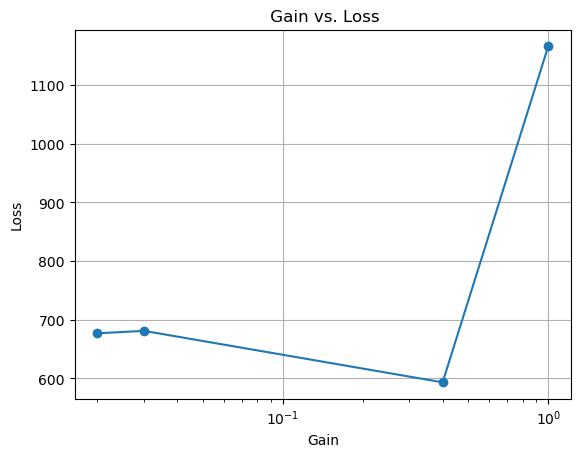

[(0.02, 1248.4914337953157),
 (0.03, 1262.197631000803),
 (0.4, 1156.6348335192572),
 (1, 1968.013351681249)]

In [78]:
learning_rate_init_values = [0.02, 0.03, 0.4, 1]
results = []
losses = []

for learning_rate_init in learning_rate_init_values:
    mlp = MLPRegressor(max_iter=10000, learning_rate='constant', learning_rate_init=learning_rate_init, random_state=42)
    mlp.fit(x_train,y_train)
    y_pred = mlp.predict(x_test)
    mse = mean_squared_error(y_test,y_pred)
    results.append((learning_rate_init, mse))
    
    losses.append(mlp.loss_)
    
plt.semilogx(learning_rate_init_values, losses, marker='o')
plt.title(" Gain vs. Loss")
plt.xlabel("Gain")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

results

In [84]:
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn.model_selection import cross_val_score

def calculate_kfold_model_scaled_results(classifier,n_splits,x,y):
    scaler = StandardScaler()
    pipeline = Pipeline([('transformer', scaler),('estimator',classifier)])
    
    cv_scores = cross_val_score( pipeline,x, y=y, scoring='r2',cv=n_splits)     
        
    return cv_scores

0.8348893601349265


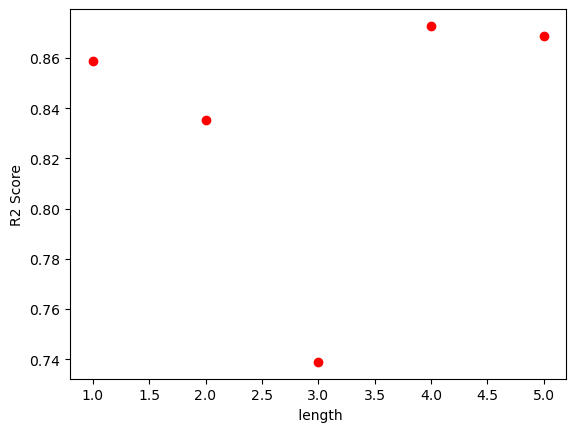

In [93]:
r2 = calculate_kfold_model_scaled_results(MLPRegressor(max_iter=10000, learning_rate='constant', learning_rate_init=0.4,random_state=42),5,x,y)

plt.scatter(range(1,6), r2, color="red")
plt.xlabel(' length')
plt.ylabel('R2 Score')
print(np.mean(r2))

In [ ]:
#In this case I go with MPLRegressor because the output was different we only choose classifier if the output is predictable as same as classifier gives continuous output on the other hand regression will not generate like this.
#Firstly, we set the range of x and y axis then we test as same as train the values then we create two helper functions, both of which will need to predict class labels.
#factor the code into one function rather than duplicating itthen the function will display selected scores(f1-score macro average, accuracy)
#Then implementMLPRegresson and learning rate to get r2 and mse resuts then set a range value to tain and test the data we will get a good learning rate grap but in multiclassifier the output will show the low accuracy rate and the size of the array will show incorect
#using pipeline to calculate kmodels then split the x and y axis then plot the grap with that valuesMultilayer perceptrons are generally composed of an input layer, an output layer and 0 or more hidden layers. The size of the hidden layers is specified via the hidden_layer_sizes parameter in MLClassifier
#where the the ith element represents the number of neurons in the ith hidden layer.
